# What is the distribution of sequence lengths for merged reads?

Based on question asked by Daniel to optimize tRNA-seq library prep

Re: 2016-08-19-HG3W5AFXX

In [6]:
.libPaths(c("/g/steinmetz/brooks/anaconda/lib/R/library",
          "~/R/x86_64-redhat-linux-gnu-library/3.2/"))
# config opts and libraries
options(repr.plot.width = 6)
options(repr.plot.height = 5)
options(jupyter.plot_mimetypes = 'image/png')
devtools::source_url("https://raw.githubusercontent.com/scalefreegan/R-tools/master/defaultRlibs.R")
library(ShortRead)

SHA-1 hash of file is 22fb06d671e2b067831995cd09e786560ab301f3

Attaching package: ‘ShortRead’

The following object is masked from ‘package:dplyr’:

    id

The following object is masked from ‘package:plyr’:

    id



In [25]:
dirPath = "/g/steinmetz/project/IESY/trna/data/2016-08-19-HG3W5AFXX/"
s1 = read_delim(file.path(dirPath, "S1_read_length.txt"), 
                delim = " ", col_names = c("Count","Length"))
s2 = read_delim(file.path(dirPath, "S2_read_length.txt"), 
                delim = " ", col_names = c("Count","Length"))
s3 = read_delim(file.path(dirPath, "S3_read_length.txt"), 
                delim = " ", col_names = c("Count","Length"))
s4 = read_delim(file.path(dirPath, "S4_read_length.txt"), 
                delim = " ", col_names = c("Count","Length"))
data = bind_rows(s1, s2, s3, s4, .id="sample" )

Parsed with column specification:
cols(
  Count = col_integer(),
  Length = col_integer()
)
Parsed with column specification:
cols(
  Count = col_integer(),
  Length = col_integer()
)
Parsed with column specification:
cols(
  Count = col_integer(),
  Length = col_integer()
)
Parsed with column specification:
cols(
  Count = col_integer(),
  Length = col_integer()
)


In [26]:
head(data)

,sample,Count,Length
1,1,79831,50
2,1,37895,51
3,1,30295,52
4,1,24720,53
5,1,20638,54
6,1,32531,55


In [38]:
p <- ggplot(data) +
  geom_freqpoly(aes(x= Length, y = Count, color = sample), stat = "identity" )

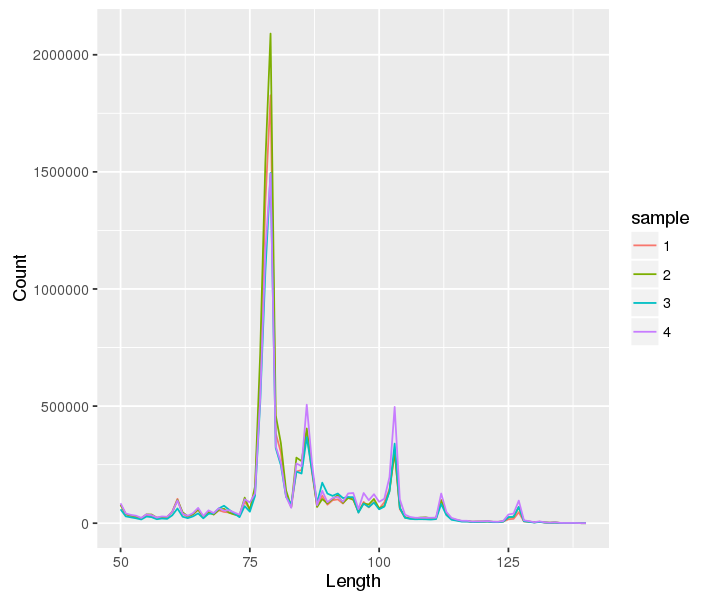

In [39]:
p